In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
from PIL import Image
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
with ZipFile('/content/face-mask-dataset.zip','r') as zip:
  zip.extractall('/content')
  print('done')

done


In [4]:
train_mask = os.listdir('/content/data/with_mask')
print(train_mask[:10])

['with_mask_3009.jpg', 'with_mask_2803.jpg', 'with_mask_1.jpg', 'with_mask_3338.jpg', 'with_mask_570.jpg', 'with_mask_285.jpg', 'with_mask_3710.jpg', 'with_mask_740.jpg', 'with_mask_426.jpg', 'with_mask_1401.jpg']


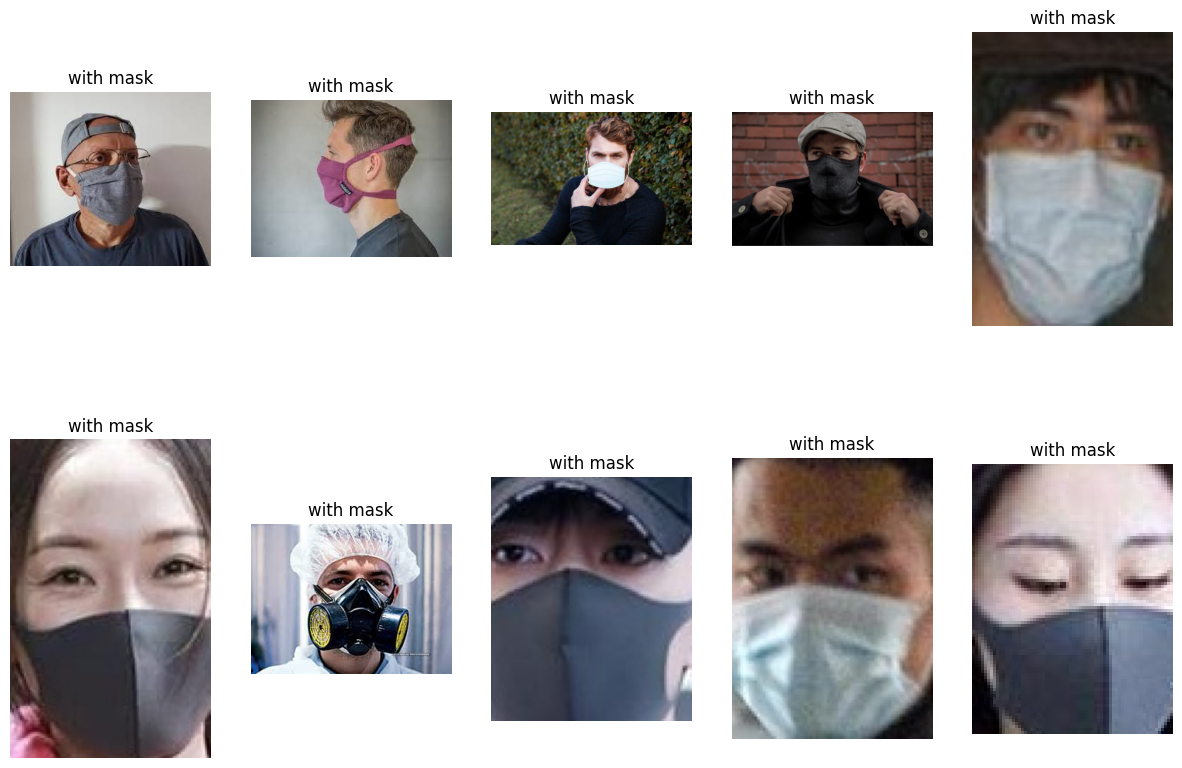

In [5]:
path = '/content/data/with_mask/'
plt.figure(figsize=(15,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(imd.imread(path + train_mask[i]))
  plt.axis('off')
  plt.title('with mask')


In [6]:
train_without_mask = os.listdir('/content/data/without_mask')

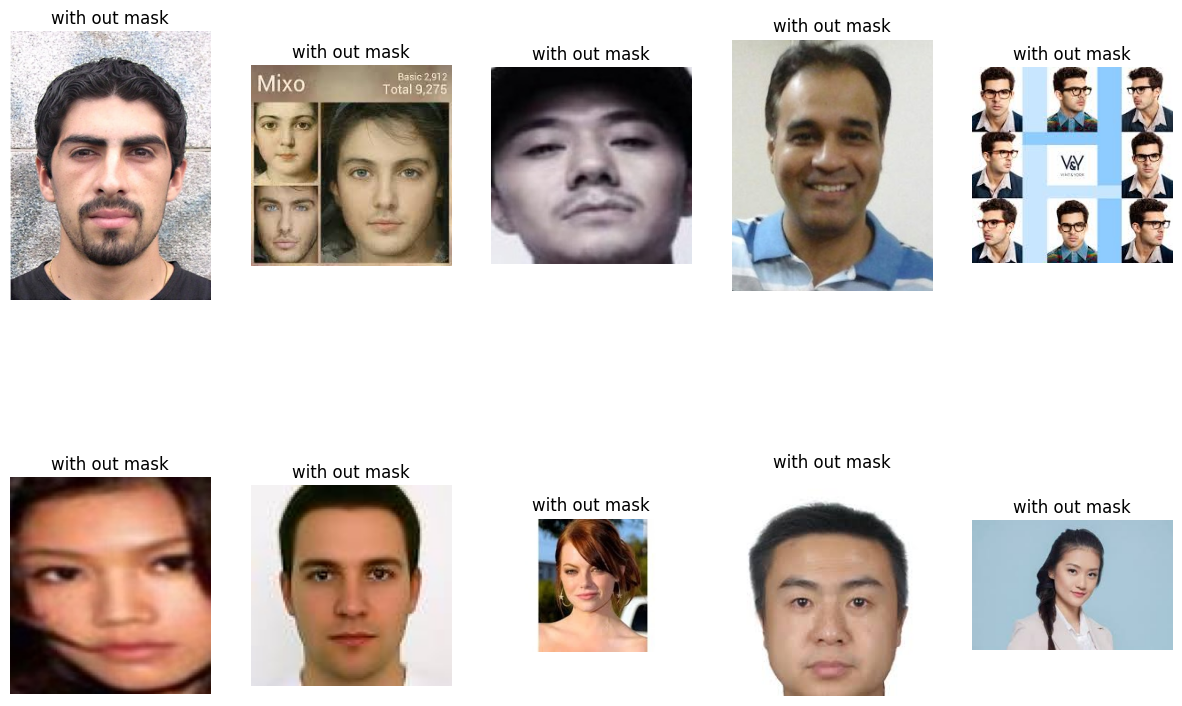

In [7]:
path = '/content/data/without_mask/'
plt.figure(figsize=(15,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(imd.imread(path  + train_without_mask[i]))
  plt.axis('off')
  plt.title('with out mask')


In [8]:
print('Mask Image: ',len(train_mask))
print('With Out Mask Image: ',len(train_without_mask))

Mask Image:  3725
With Out Mask Image:  3828


In [9]:
mask_label = [1]*3725
without_mask_label = [0]*3828
label = mask_label + without_mask_label
print(type(label))
print(len(label))

<class 'list'>
7553


In [10]:
mask_path = '/content/data/with_mask/'
data = []
for img_file in train_mask:
  image = Image.open(mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


mask_path = '/content/data/without_mask/'
for img_file in train_without_mask:
  image = Image.open(mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [11]:
X = np.array(data)
y = np.array(label)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [14]:
X_train = X_train/255.0
X_test = X_test/255.0

# **Traning Model**

In [15]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),

    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,401 (1.79 MB)

 Trainable params: 470,401 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
tensorboard = TensorBoard(log_dir='logs')

In [17]:
model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback,tensorboard])

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.6517 - loss: 0.5750 - val_accuracy: 0.9289 - val_loss: 0.1897
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9157 - loss: 0.2321 - val_accuracy: 0.9438 - val_loss: 0.1664
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9425 - loss: 0.1900 - val_accuracy: 0.9405 - val_loss: 0.1699
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9458 - loss: 0.1686 - val_accuracy: 0.9388 - val_loss: 0.1496
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9445 - loss: 0.1568 - val_accuracy: 0.9372 - val_loss: 0.1574
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9540 - loss: 0.1308 - val_accuracy: 0.9438 - val_loss: 0.1463
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9629 - loss: 0.1109 - val_accuracy: 0.9471 - val_loss: 0.1361
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9663 - loss: 0.1031 - val_acc

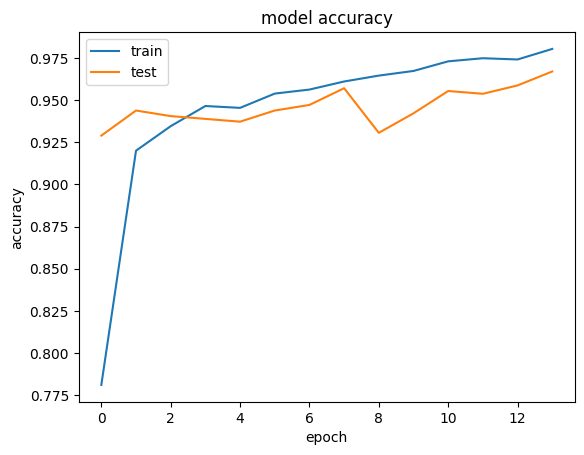

In [18]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

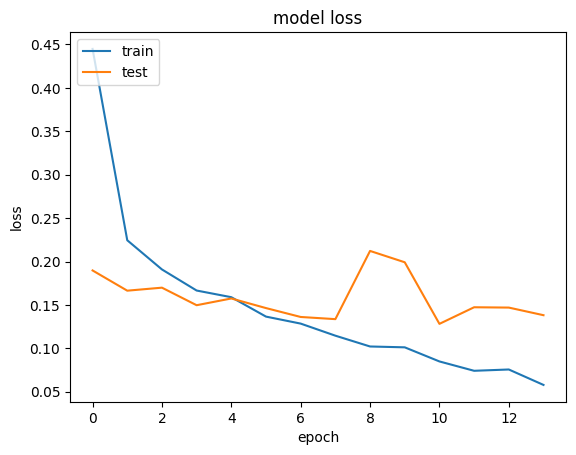

In [20]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#

In [21]:
y_pred = model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


In [22]:
loss,accuracy = model.evaluate(X_test,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9564 - loss: 0.0994


In [23]:
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))

[[719  31]
 [ 26 735]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       750
           1       0.96      0.97      0.96       761

    accuracy                           0.96      1511
   macro avg       0.96      0.96      0.96      1511
weighted avg       0.96      0.96      0.96      1511



In [24]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc2pXVLcHD_A3ZJKygMpA52bWsEElSvS6VFQ&s

/bin/bash: line 1: s: command not found
--2024-08-13 07:57:59--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc2pXVLcHD_A3ZJKygMpA52bWsEElSvS6VFQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.250.141.139, 142.250.141.113, 142.250.141.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.250.141.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4771 (4.7K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcQc2pXVLcHD_A3ZJKygMpA52bWsEElSvS6VFQ’

images?q=tbn:ANd9Gc 100%[===================>]   4.66K  --.-KB/s    in 0s      

2024-08-13 07:57:59 (65.5 MB/s) - ‘images?q=tbn:ANd9GcQc2pXVLcHD_A3ZJKygMpA52bWsEElSvS6VFQ’ saved [4771/4771]



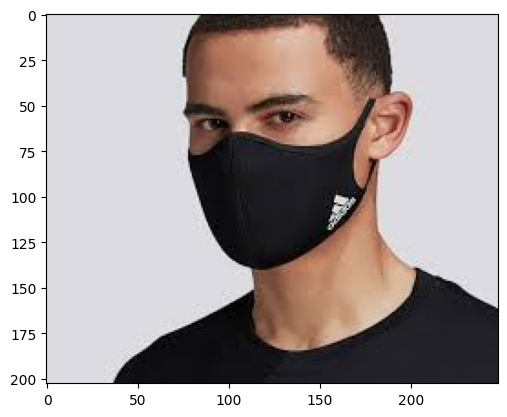

In [25]:
plt.imshow(imd.imread('/content/sample'))

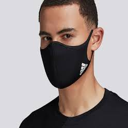

In [26]:
image = Image.open('/content/sample')
image = image.resize((128,128))
image = image.convert('RGB')


In [27]:
image = np.array(image)
image = image/255.0
image = np.expand_dims(image,axis=0)

In [29]:
model.save('model.h5')

In [30]:
from keras.models import load_model
model = load_model('/content/model.h5')

In [32]:
prediction = model.predict(image)
if prediction > 0.5:
  print('Mask')
else:
  print('No Mask')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Mask


In [33]:
def Prediction(image):
  image = Image.open(image)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  image = image/255.0
  image = np.expand_dims(image,axis=0)
  prediction = model.predict(image)
  if prediction > 0.5:
    print('Mask')
  else:
    print('No Mask')

In [35]:
# !wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKdcRCOADyB_FLkNZcPC0p_x0QOaoOApRJww&s
Prediction('/content/not_mask')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
No Mask
